In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.dpi'] = 100

In [3]:
df = pd.read_csv("3.csv")
df

,n,stretched length (cm),half-amplitude length (cm),unstretched length (cm),mass (g),frequency (Hz)
0,4,128.00,130.5,119.25,NaN,NaN
1,3,95.70,99.0,89.55,150.0,30.0
2,2,65.30,65.0,61.50,NaN,NaN
3,1,33.25,34.0,30.75,NaN,NaN


In [4]:
# String length
L = df["stretched length (cm)"].to_numpy()/100
dL = np.abs(df["half-amplitude length (cm)"]/100 - L).to_numpy()
L0 = df["unstretched length (cm)"].to_numpy()/100

# Tensioning mass
M = 150 / 1000
dM = 0.1
g = 9.8
T = M * g
dT = dM * g

In [5]:
def model(L0, gamma):
    return L0 * (1 + T*gamma)

[fit, cov] = sp.optimize.curve_fit(model, L0, L, sigma=dL)
[gamma] = fit
[[dGamma]] = np.sqrt(cov)
gamma, dGamma

(0.04296842499973986, 0.001716256634749477)

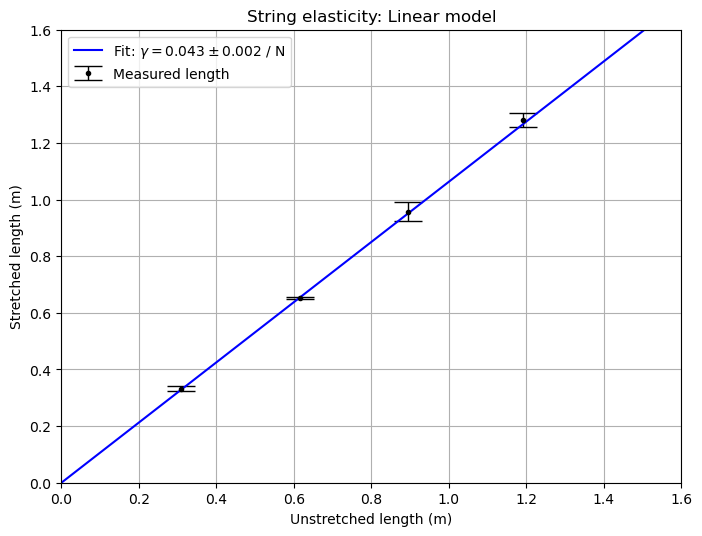

In [9]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.title("String elasticity: Linear model")
plt.errorbar(
    L0, L, yerr = dL,
    label="Measured length",
    color = "black", ecolor="black",
    linewidth = 0, elinewidth = 1, capsize=10, markersize = 3,
    marker = 'o'
)
ll = np.array([0 , 1.6])
plt.plot(ll, model(ll, gamma), color="blue", label=f"Fit: $\gamma = {gamma:.3f} \\pm {dGamma:.3f}$ / N")
plt.legend()
plt.xlabel("Unstretched length (m)")
plt.ylabel("Stretched length (m)")
plt.xlim(0, 1.6)
plt.ylim(0, 1.6)
plt.grid()
plt.savefig("gamma.png")
plt.show()

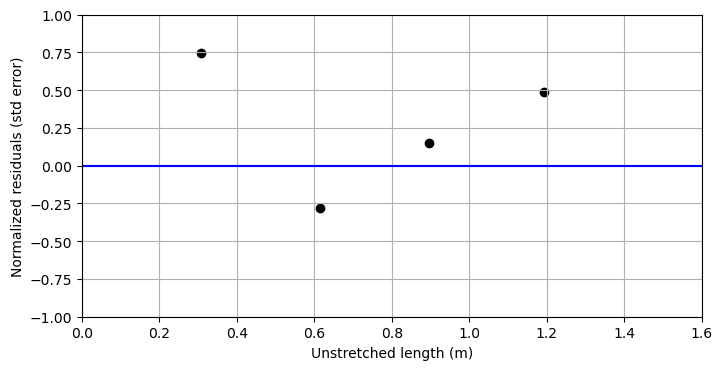

In [10]:
plt.rcParams['figure.figsize'] = [8, 4]
plt.scatter(L0, (L - model(L0, gamma))/dL, color="black")
# plt.legend()
plt.xlabel("Unstretched length (m)")
plt.ylabel("Normalized residuals (std error)")
plt.xlim(0, 1.6)
plt.ylim(-1, 1)
plt.axhline(0, color="blue")
plt.grid()
plt.savefig("gamma_res.png")
plt.show()

In [8]:
gamma, dGamma

(0.04296842499973986, 0.001716256634749477)